# 4주차 스터디

Made by 35기 코딩부장 류제현

## 머신러닝을 위한 데이터 처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 사용할 데이터셋 불러오기
from sklearn.datasets import fetch_california_housing
dict_house = fetch_california_housing(as_frame=True)

# 딕셔너리 형태로 반환된 데이터를 예쁘게 데이터프레임 형태로 변형해보자
X = dict_house['data']
y = dict_house['target']

print(X.shape, y.shape)
X.head()

(20640, 8) (20640,)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# info로 Null값이 존재하는 지 찾아보자
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### 1. 데이터 전처리

    1-1) Train-Test Split

ML을 위해서는 우선 데이터를 Train_set(훈련세트)와 Test_set(테스트세트)로 분리해 줘야 한다

scikit-learn의 train_test_split 함수를 사용하면 된다

-> 왜 분리 할까? : 모델을 만든 후, Test 성능 측정을 위해

In [4]:
# train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split

# 앞에서 분리해 둔 X,y를 사용 
# Shuuffle이 필요하지만, train_test_split은 shuffle을 해줌 / 시계열일 경우는 달라진다
X_train, X_test, y_train, y_test = train_test_split(X,y)

# 잘 분리 된 것을 확인 할 수 있다
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

    1-2) 고차항 특성 추가하기

PolinomialFeature를 사용해 고차항 특성을 추가해보겠습니다

In [5]:
# reshape(-1,1)을 해주는 이유는? -> 각각을 하나의 데이터로 인식하도록 하기 위해서
X_sample = np.arange(1,5).reshape(-1,1)
X_sample

array([[1],
       [2],
       [3],
       [4]])

In [6]:
from sklearn.preprocessing import PolynomialFeatures

# degree로 몇차식까지 추가할 지 선택할 수 있습니다
poly_features = PolynomialFeatures(degree=3, include_bias=False) # include_bias=True일 경우 1이 추가됩니다
X_poly = poly_features.fit_transform(X_sample)

X_poly

array([[ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

    1-3) 스케일 조절하기

* Normalization(정규화), MinMaxScaling(0과 1사이로 변경) 등이 있다 

* 몇몇 머신러닝 알고리즘을 제외하고는 피처(Feature)의 스케일에 민감하다. 따라서 스케일링이 필요하다

* fit을 해주면 필요한 통계량을 계산한다. 이후 transfrom 해준다. (!! Test_set에는 fit 하지 않도록 주의해야 한다 !! -> Data Leakage 누출 방지)

In [7]:
# 최소는 0, 최대는 1로 변환한다
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X_train) 

# 변형이 잘 된 것으로 확인할 수 있다
X_minmax

array([[3.99891036e-01, 3.33333333e-01, 3.89983218e-02, ...,
        2.12445896e-03, 1.26461211e-01, 6.33633634e-01],
       [8.59367457e-02, 3.52941176e-01, 2.87416419e-02, ...,
        1.61851419e-03, 7.24760893e-01, 1.20120120e-01],
       [2.42293210e-01, 8.82352941e-01, 2.72811108e-02, ...,
        2.48343437e-03, 5.51540914e-01, 1.88188188e-01],
       ...,
       [3.80663715e-01, 6.66666667e-01, 3.60775497e-02, ...,
        1.85219483e-03, 5.02656748e-01, 2.37237237e-01],
       [1.82880236e-01, 4.11764706e-01, 2.08214304e-02, ...,
        6.57546307e-04, 1.64718385e-01, 5.93593594e-01],
       [1.76466531e-01, 7.84313725e-02, 3.33862814e-02, ...,
        1.20471682e-03, 1.63655685e-01, 7.09709710e-01]])

In [8]:
# 과연 최댓값은 1로, 최솟값은 0으로 변환이 되었을 지 확인해보자 

# argmax는 최대값이 위치한 인덱스를 반환합니다(argmin은 반대)
idx_max = np.argmax(X_minmax[:,1])
idx_min = np.argmin(X_minmax[:,1])

# 최댓값은 1, 최솟값은 0으로 잘 변환이 된 것을 확인할 수 있습니다
print("최대: ", X_minmax[idx_max])
print("최소: ", X_minmax[idx_min])

최대:  [0.2316106  1.         0.03188134 0.01615853 0.03027245 0.00212369
 0.54941552 0.18518519]
최소:  [0.25862402 0.         0.14612171 0.07388349 0.0110999  0.00233131
 0.54303932 0.33733734]


In [9]:
# 많이들 익숙한 "정규화" -> 데이터의 평균이 0, 분산은 1을 따르도록 변경한다
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_std = std.fit_transform(X_train)
X_std

array([[ 1.28698944, -0.84854873,  0.25626429, ...,  0.01867851,
        -0.88838472,  0.79345929],
       [-1.11848987, -0.76909401, -0.32223588, ..., -0.03386633,
         1.74861828, -1.764296  ],
       [ 0.0794942 ,  1.37618353, -0.40461317, ...,  0.05595986,
         0.98515205, -1.42525632],
       ...,
       [ 1.13967206,  0.50218157,  0.09152607, ..., -0.00959745,
         0.76969532, -1.18094831],
       [-0.37572072, -0.53072984, -0.7689539 , ..., -0.13366753,
        -0.71976641,  0.59402418],
       [-0.42486174, -1.88146013, -0.06026761, ..., -0.0768412 ,
        -0.72445025,  1.17238599]])

In [10]:
# 번외: 이 정도 전처리는 싸이킷런을 안쓰고도 할 수 있어야 한다.
## 직접 정규화를 수행해 봅시다.

# 정규화 -> 평균을 빼주고, 표준편차로 나눈다 (직접 시켜보기)
mean = X_train.mean(axis=0)   # axis바꿔가며 결과 보여주기
std = X_train.std(axis=0)

# 정규화 해주자 -> 결과가 똑같이 나왔다!!!
(X_train - mean) / std 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
11440,1.286948,-0.848521,0.256256,-0.350631,0.566696,0.018678,-0.888356,0.793434
9482,-1.118454,-0.769069,-0.322225,0.002534,-0.724067,-0.033865,1.748562,-1.764239
15927,0.079492,1.376139,-0.404600,-0.182273,0.106159,0.055958,0.985120,-1.425210
16938,3.282062,1.693948,1.047020,-0.260994,-0.694384,-0.045382,0.905497,-1.380339
20283,-0.339832,0.184357,-0.484775,-0.124084,1.150462,0.107015,-0.677590,0.190162
...,...,...,...,...,...,...,...,...
12339,-0.249954,-0.848521,1.379664,1.516021,0.533415,-0.077508,-0.836835,1.491434
18239,-0.364137,-0.451261,-1.255098,-0.166836,-0.943541,-0.110919,0.830558,-1.265667
17633,1.139635,0.502165,0.091523,-0.103340,-0.387659,-0.009597,0.769670,-1.180910
8834,-0.375709,-0.530713,-0.768929,-0.054855,0.314839,-0.133663,-0.719743,0.594005


    1-4) Null값 다루기

결측치(Null)를 다루는 다양한 방법이 있습니다 (Domain 지식이 필요)

1. 유사한 값을 찾아서 넣기 (평균, 중위수 등)

2. 단순히 결측치가 존재하는 데이터를 전부 Drop 해주기

In [11]:
# 새로운 데이터셋 불러오기 (타이타닉 데이터셋)
from seaborn import load_dataset
df = load_dataset("titanic")

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
# 이 데이터셋의  "survived","sex","age","sibsp","parch","class" 특성만 사용하겠습니다
df = df[["survived","sex","age","sibsp","parch","class"]]
df.head(6)

,survived,sex,age,sibsp,parch,class
0,0,male,22.0,1,0,Third
1,1,female,38.0,1,0,First
2,1,female,26.0,0,0,Third
3,1,female,35.0,1,0,First
4,0,male,35.0,0,0,Third
5,0,male,NaN,0,0,Third


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       714 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(1)
memory usage: 35.9+ KB


In [14]:
# age의 데이터는 714개로 177개의 Null값이 존재합니다.
# 177개의 데이터는 drop하기에는 너무 많습니다. 나이의 Null값에 평균 나이를 집어 넣는 간단한 방법으로 전처리 해 보겠습니다

age_data = df['age'].values.reshape(-1,1)

## 싸이킷런의 SimpleImputer를 사용하겠습니다
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='mean')
df['age'] = impute.fit_transform(age_data)

print(df.shape)
df.head(6)

(891, 6)


,survived,sex,age,sibsp,parch,class
0,0,male,22.000000,1,0,Third
1,1,female,38.000000,1,0,First
2,1,female,26.000000,0,0,Third
3,1,female,35.000000,1,0,First
4,0,male,35.000000,0,0,Third
5,0,male,29.699118,0,0,Third


In [15]:
# fillna를 사용해서 좀 더 쉬운 풀이도 가능합니다

df.age = df.age.fillna(df.age.mean())
df.head(6)

,survived,sex,age,sibsp,parch,class
0,0,male,22.000000,1,0,Third
1,1,female,38.000000,1,0,First
2,1,female,26.000000,0,0,Third
3,1,female,35.000000,1,0,First
4,0,male,35.000000,0,0,Third
5,0,male,29.699118,0,0,Third


    1-5) 범주형 특성(Categorical Data 다루기)

* 데이터의 순서가 의미가 있는 특성이 있고, 의미가 없는 특성이 있다

* 의미가 있는 특성은 순서가 있는 변수(Ordinal Variable)로, 없는 특성은 더미변수(Dummy Variable)로 변환해준다

In [16]:
# 범주형 특성을 처리하기에 앞서, 예시를 하나 보고 넘어가도록 하겠습니다.
## 더미변수 예시 -> 값에는 First,Second,Third가 있습니다(1등석,2등석,3등석)
pd.get_dummies(df["class"])

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [17]:
# 통계학 / 계량경제학에서 사용하는 더미변수 (다중공선성(Multicollinearity) 방지)
pd.get_dummies(df["class"], drop_first=True)

,Second,Third
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [18]:
# 데이터프레임 전체를 주면 판다스가 알아서 Categorical Data를 인식해서 더미를 만든다
pd.get_dummies(df)

,survived,age,sibsp,parch,sex_female,sex_male,class_First,class_Second,class_Third
0,0,22.000000,1,0,0,1,0,0,1
1,1,38.000000,1,0,1,0,1,0,0
2,1,26.000000,0,0,1,0,0,0,1
3,1,35.000000,1,0,1,0,1,0,0
4,0,35.000000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,0,1,0,1,0
887,1,19.000000,0,0,1,0,1,0,0
888,0,29.699118,1,2,1,0,0,0,1
889,1,26.000000,0,0,0,1,1,0,0


In [19]:
# 이번엔 순서를가진(Ordinal) 데이터를 인코딩해보겠습니다
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
ordinal.fit_transform(df["class"].values.reshape(-1,1))[:10]

array([[2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.]])

### 2. Overfitting & Underfitting

1. 너무 복잡한 모델을 사용하면 -> Overfit  (Train-set에 과적합 되어 있음을 의미)

2. 너무 단순한 모델을 사용하면 -> Underfit

둘 사이의 Trade-off가 존재함

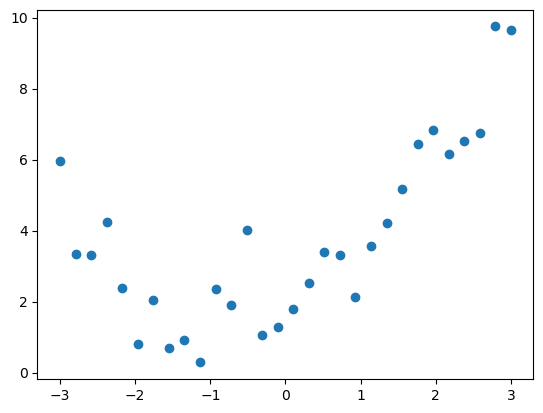

In [24]:
# 데이터 피팅을 위해서 임의의 데이터를 생성하겠습니다.
m = 30

X_new = np.linspace(-3,3,m).reshape(-1,1)
y_new = 0.5 * X_new**2 + X_new + 2 + np.random.randn(m, 1)
plt.scatter(X_new,y_new);

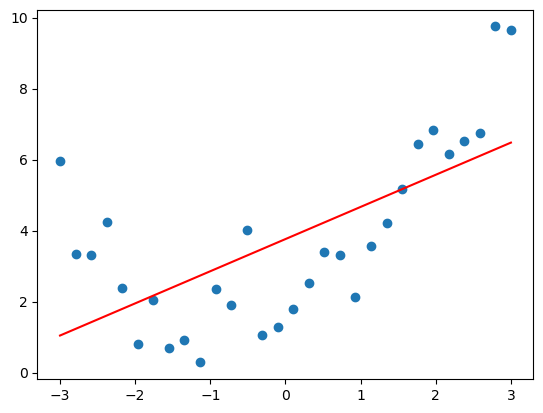

In [25]:
# Underfitting 예시 
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_new,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_new)

# 그림으로 그려보겠습니다 -> 데이터의 곡선을 똑바로 잡아내지 못 한 것을 확인할 수 있습니다
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');

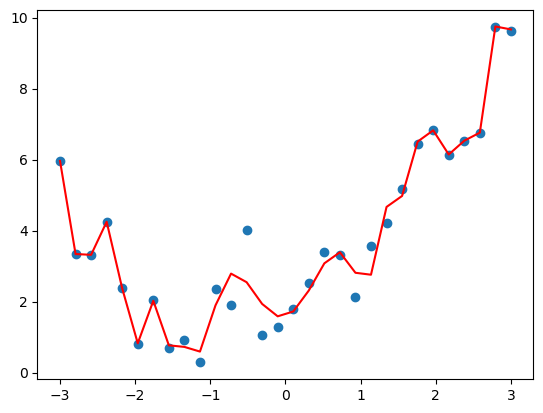

In [30]:
# Overfitting 예시 
from sklearn.linear_model import LinearRegression


poly_feature = PolynomialFeatures(degree=30)
X_poly = poly_feature.fit_transform(X_new)

# 40차항의 다항식을 회귀
linear_model = LinearRegression()
linear_model.fit(X_poly,y_new)

# 선형모형의 예측값을 저장하겠습니다
fitted_values = linear_model.predict(X_poly)

# 그림으로 그려보겠습니다 -> 현재 주어진 데이터에 너무 과도하게 맞춰진 것을 확인할 수 있습니다 -> Overfit
plt.scatter(X_new,y_new)
plt.plot(X_new,fitted_values, color='r');